In [1]:
import pandas as pd
from pathlib import Path
import os
from glob import glob

In [70]:
df = pd.read_csv("/home/hawau/Greek-Document-Search-Engine/data/_outputs_bowphs_GreBerta/Greek_benchmark_best_cosine_similarities.txt", sep="\t")

df.describe()

,Target #0,Target #1,Target #2,Target #3,Target #4,best #0,best #1,best #2,best #3,best #4,...,best #990,best #991,best #992,best #993,best #994,best #995,best #996,best #997,best #998,best #999
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.776235,0.751934,0.713743,0.702189,0.696912,0.710014,0.700408,0.692027,0.686883,0.682355,...,0.588993,0.591072,0.588865,0.589120,0.589500,0.590470,0.588711,0.588886,0.589798,0.590362
std,0.082782,0.087248,0.084822,0.086322,0.084703,0.036866,0.033885,0.034529,0.032209,0.033566,...,0.031265,0.030204,0.030782,0.030555,0.031574,0.031942,0.030809,0.030719,0.031186,0.029288
min,0.379000,0.472500,0.474700,0.468000,0.466000,0.609000,0.597900,0.587600,0.579600,0.579200,...,0.498300,0.505100,0.509800,0.507200,0.504600,0.503600,0.510900,0.500400,0.502500,0.510900
25%,0.735900,0.707475,0.655775,0.658075,0.638425,0.688700,0.678400,0.670300,0.666725,0.659700,...,0.566025,0.572225,0.567150,0.569675,0.569175,0.571125,0.566875,0.570775,0.569550,0.572725
50%,0.792050,0.765100,0.721150,0.709850,0.704650,0.710400,0.699700,0.693050,0.689650,0.686350,...,0.590800,0.592900,0.590050,0.589950,0.590250,0.590650,0.590950,0.589450,0.591000,0.591150
75%,0.820000,0.806800,0.772100,0.769325,0.755100,0.735600,0.722550,0.715275,0.709350,0.705975,...,0.608825,0.612000,0.609400,0.608775,0.610875,0.607900,0.610325,0.610500,0.608200,0.610575
max,1.000000,0.901300,0.899900,0.876600,0.899100,0.829500,0.768100,0.762300,0.753800,0.749500,...,0.668100,0.660000,0.668600,0.674400,0.660000,0.669900,0.659900,0.659900,0.672900,0.659800


In [76]:
top_k = [f"best #{i}" for i in range(0, 5)]

top5_columns_per_row = df[top_k].iloc[1:6].apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

top5_columns_per_row

1    [best #0, best #1, best #2, best #3, best #4]
2    [best #0, best #1, best #2, best #3, best #4]
3    [best #1, best #0, best #2, best #3, best #4]
4    [best #0, best #1, best #2, best #3, best #4]
5    [best #0, best #2, best #1, best #4, best #3]
dtype: object

In [12]:
df.head()

,Query,Target #0,Target #1,Target #2,Target #3,Target #4,best #0,best #1,best #2,best #3,...,best #990,best #991,best #992,best #993,best #994,best #995,best #996,best #997,best #998,best #999
0,Λέγεται ὅτι αἱ γυναῖκες σοφώτεραι εἶναι τῶν ἀν...,0.7927,0.7942,0.7798,0.7831,0.7472,0.8306,0.7970,0.8048,0.8412,...,0.7619,0.7821,0.7934,0.7792,0.7409,0.7718,0.7626,0.8014,0.7642,0.7285
1,"Ἀνθρώπων ἡ κατοικία οὐ μόνον ἐν γῇ, ἀλλὰ καὶ ἐ...",0.8634,0.8930,0.8080,0.8015,0.8250,0.8176,0.8540,0.8200,0.8633,...,0.8264,0.8055,0.8398,0.7942,0.8353,0.8195,0.8661,0.8380,0.7982,0.8002
2,"Ἐν τῷ νότῳ τῆς Ἀντιόχειας, οἱ πρεσβύτεροι τρέφ...",0.8566,0.8645,0.8022,0.7885,0.8044,0.7946,0.7785,0.8547,0.7840,...,0.8433,0.8167,0.7499,0.8424,0.7900,0.8344,0.8325,0.8051,0.7440,0.8214
3,οἱ ὄνοι εἰσὶ τὰ ζῷα ἐναργέστατα πάντων,0.8078,0.7489,0.7653,0.7751,0.7922,0.7968,0.7514,0.7420,0.8070,...,0.7193,0.7250,0.7555,0.7473,0.7591,0.7791,0.7252,0.6833,0.7454,0.7623
4,οἱ ἀπόστολοι ἐφόνευσαν πολλοὺς παῖδας.,0.8243,0.7550,0.7951,0.8084,0.8092,0.7209,0.8140,0.7853,0.7703,...,0.7749,0.7577,0.7386,0.7597,0.7791,0.7892,0.7419,0.7802,0.7230,0.7779


In [31]:
cosine_results

['/home/hawau/Greek-Document-Search-Engine/data/_outputs_bowphs_LaBerta/Greek_benchmark_best_cosine_similarities.txt',
 '/home/hawau/Greek-Document-Search-Engine/data/_outputs_bowphs_PhilBerta/Greek_benchmark_best_cosine_similarities.txt',
 '/home/hawau/Greek-Document-Search-Engine/data/_outputs_bowphs_GreBerta/Greek_benchmark_best_cosine_similarities.txt',
 '/home/hawau/Greek-Document-Search-Engine/data/_outputs_bowphs_GreTa/Greek_benchmark_best_cosine_similarities.txt',
 '/home/hawau/Greek-Document-Search-Engine/data/_outputs_bowphs_SPhilBerta/Greek_benchmark_best_cosine_similarities.txt',
 '/home/hawau/Greek-Document-Search-Engine/data/_outputs_bowphs_PhilTa/Greek_benchmark_best_cosine_similarities.txt',
 '/home/hawau/Greek-Document-Search-Engine/data/_outputs_princeton-logion_logion-bert-base/Greek_benchmark_best_cosine_similarities.txt']

In [2]:
cosine_results = list(glob("/home/hawau/Greek-Document-Search-Engine/data_parallel/*/Greek_benchmark_best_cosine_similarities.txt"))


for i in cosine_results:
    print("--------------------------------------------------")
    print(Path(i).parent.name)
    print("--------------------------------------------------")

    df = pd.read_csv(i, sep="\t")
    targets = [f"Target #{i}" for i in range(0, 5)]
    # + targets

    # top5_columns_per_row = df[top_k].apply(lambda row: row.nlargest(5).index.tolist(), axis=1)
    # print("Top 5 Columns for Rows 1 - 5:")
    # print(top5_columns_per_row)
    print("Target Metrics:")
    print(df[targets].mean(axis=1).describe())

    print("----------------")
    print("Top 5 Metrics:")
    top_k = [f"best #{i}" for i in range(0, 5)] 
    print(df[top_k].mean(axis=1).describe())

    print("----------------")
    print("Top 1000 Metrics:")
    top_k = [f"best #{i}" for i in range(0, 1000)] 
    print(df[top_k].mean(axis=1).describe())

--------------------------------------------------
_outputs_bowphs_PhilBerta
--------------------------------------------------
Target Metrics:
count    20.000000
mean      0.539798
std       0.077168
min       0.372840
25%       0.479040
50%       0.539390
75%       0.596185
max       0.657100
dtype: float64
----------------
Top 5 Metrics:
count    20.000000
mean      0.604484
std       0.108175
min       0.302660
25%       0.549685
50%       0.617010
75%       0.663100
max       0.826460
dtype: float64
----------------
Top 1000 Metrics:
count    20.000000
mean      0.513515
std       0.053586
min       0.369194
25%       0.492127
50%       0.523103
75%       0.557213
max       0.574418
dtype: float64
--------------------------------------------------
_outputs_bowphs_GreBerta
--------------------------------------------------
Target Metrics:
count    20.000000
mean      0.718256
std       0.052016
min       0.615220
25%       0.683455
50%       0.718760
75%       0.756315
max       0.

In [3]:
faiss_results = list(glob("/home/hawau/Greek-Document-Search-Engine/data_parallel/*/Greek_benchmark_best_faiss_distances.txt"))


for i in faiss_results:
    print("--------------------------------------------------")
    print(Path(i).parent.name)
    print("--------------------------------------------------")

    df = pd.read_csv(i, sep="\t")
    targets = [f"Target #{i}" for i in range(0, 5)]
    # + targets

    # top5_columns_per_row = df[top_k].apply(lambda row: row.nlargest(5).index.tolist(), axis=1)
    # print("Top 5 Columns for Rows 1 - 5:")
    # print(top5_columns_per_row)
    print("Target Metrics:")
    print(df[targets].mean(axis=1).describe())

    print("----------------")
    print("Top 5 Metrics:")
    top_k = [f"best #{i}" for i in range(0, 5)] 
    print(df[top_k].mean(axis=1).describe())

    print("----------------")
    print("Top 1000 Metrics:")
    top_k = [f"best #{i}" for i in range(0, 1000)] 
    print(df[top_k].mean(axis=1).describe())

--------------------------------------------------
_outputs_bowphs_PhilBerta
--------------------------------------------------
Target Metrics:
count    20.000000
mean      0.920406
std       0.154350
min       0.685740
25%       0.807635
50%       0.921220
75%       1.041955
max       1.254340
dtype: float64
----------------
Top 5 Metrics:
count    20.000000
mean      0.791032
std       0.216349
min       0.347080
25%       0.673800
50%       0.765990
75%       0.900590
max       1.394680
dtype: float64
----------------
Top 1000 Metrics:
count    20.000000
mean      0.972969
std       0.107170
min       0.851165
25%       0.885574
50%       0.953794
75%       1.015743
max       1.261607
dtype: float64
--------------------------------------------------
_outputs_bowphs_GreBerta
--------------------------------------------------
Target Metrics:
count    20.000000
mean      0.563491
std       0.104024
min       0.364940
25%       0.487365
50%       0.562500
75%       0.633065
max       0.

### Relevance Ranking

In [4]:
def mean_reciprocal_rank(rankings: list[list[int]]) -> float:
    """
    Args:
        rankings: A list of queries, each containing a list where
                  1 = relevant, 0 = not relevant (ordered by predicted rank).
    Returns:
        MRR score
    """
    reciprocal_ranks = []
    for ranked_list in rankings:
        try:
            rank = ranked_list.index(1) + 1  # first relevant item
            reciprocal_ranks.append(1 / rank)
        except ValueError:
            reciprocal_ranks.append(0.0)  # no relevant item found
    return sum(reciprocal_ranks) / len(rankings)


import math

def dcg(relevance: list[int], k: int) -> float:
    return sum((2**rel - 1) / math.log2(i + 2) for i, rel in enumerate(relevance[:k]))

def ndcg(relevance: list[int], k: int) -> float:
    ideal = sorted(relevance, reverse=True)
    idcg = dcg(ideal, k)
    return dcg(relevance, k) / idcg if idcg > 0 else 0.0

def average_ndcg(relevance_lists: list[list[int]], k: int) -> float:
    scores = [ndcg(rel, k) for rel in relevance_lists]
    return sum(scores) / len(scores)

In [5]:
import pandas as pd
from glob import glob
from pathlib import Path

cosine_results = list(glob("/home/hawau/Greek-Document-Search-Engine/data_parallel/*/Greek_benchmark_best_cosine_similarities.txt"))


for i in cosine_results:
    print("--------------------------------------------------")
    print(Path(i).parent.name)
    print("--------------------------------------------------")

    df = pd.read_csv(i, sep="\t")
    targets = [f"Target #{i}" for i in range(0, 5)]
    top_k = [f"best #{i}" for i in range(0, 1000)] + targets

    top5_columns_per_row = df[top_k].apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

    r_rank = pd.DataFrame(top5_columns_per_row)
    r_rank['scores'] = r_rank[0].apply(lambda xx: [1 if x.split(" ")[0] == "Target" else 0 for x in xx])

    k = 5
    avg_score = average_ndcg(r_rank['scores'].tolist(), k)
    print(f"Average NDCG@{k}: {avg_score:.4f}")

    mrr = mean_reciprocal_rank(r_rank['scores'].tolist())
    print(f"Mean Reciprocal Rank: {mrr:.4f}")

    print("")

--------------------------------------------------
_outputs_bowphs_PhilBerta
--------------------------------------------------
Average NDCG@5: 0.0465
Mean Reciprocal Rank: 0.0267

--------------------------------------------------
_outputs_bowphs_GreBerta
--------------------------------------------------
Average NDCG@5: 0.4506
Mean Reciprocal Rank: 0.3142

--------------------------------------------------
_outputs_bowphs_GreTa
--------------------------------------------------
Average NDCG@5: 0.0325
Mean Reciprocal Rank: 0.0250

--------------------------------------------------
_outputs_bowphs_SPhilBerta
--------------------------------------------------
Average NDCG@5: 0.1450
Mean Reciprocal Rank: 0.0933

--------------------------------------------------
_outputs_bowphs_PhilTa
--------------------------------------------------
Average NDCG@5: 0.0215
Mean Reciprocal Rank: 0.0125

--------------------------------------------------
_outputs_princeton-logion_logion-bert-base
--------

### Visualizations

In [39]:
queries = pd.read_csv("/home/hawau/Greek-Document-Search-Engine/data/Greek_benchmark.txt", sep="\t")['Query'].tolist()[:5]
queries

['Λέγεται ὅτι αἱ γυναῖκες σοφώτεραι εἶναι τῶν ἀνδρῶν.',
 'Ἀνθρώπων ἡ κατοικία οὐ μόνον ἐν γῇ, ἀλλὰ καὶ ἐν τοῖς ἀπείροις οὐρανοῖς εἶναι λέγεται.',
 'Ἐν τῷ νότῳ τῆς Ἀντιόχειας, οἱ πρεσβύτεροι τρέφονται ὑπὸ ξύλων καὶ ἰών.',
 ' οἱ ὄνοι εἰσὶ τὰ ζῷα ἐναργέστατα πάντων',
 'οἱ ἀπόστολοι ἐφόνευσαν πολλοὺς παῖδας.']

In [64]:
df = pd.read_csv("/home/hawau/Greek-Document-Search-Engine/data/Greek_benchmark_best_targets.txt", sep="\t")
top_k = [f"best #{i}" for i in range(0, 5)]
top_k

['best #0', 'best #1', 'best #2', 'best #3', 'best #4']

In [65]:
queries = df[top_k].iloc[1].tolist()

queries

['Σωζομένων γὰρ τῶν ἐπὶ γῆς, χαρὰ ἔσται ἐν οὐρανοῖς, συγχαιρόντων τῶν ἐν τοῖς ὑψίστοις οἰκούντων ἀγγέλων τῇ τῶν ἀνθρώ πων σωτηρίᾳ.',
 'Οὐκ ἐν τῷ οὐρανῷ μόνον, ἀλλὰ καὶ ἐν τῇ γῇ.',
 'Οὐ μόνον δὲ ἡ γῆ καὶ τὸ πλήρωμα αὐτῆς, ἀλλὰ καὶ ἡ οἰκουμένη. Ἐν ἐρήμῳ κατοικεῖ ὁ ἁμαρτωλὸς, ὁ δὲ ἐν τῇ Ἐκκλησίᾳ τυγ χάνων τῇ πεπληρωμένῃ τῆς ἁγίας Τριάδος, οὗτος κατοικεῖ τὴν οἰκουμένην, ἥτις ἐστὶν ἡ Ἐκκλησία, ἐπὶ θαλασσῶν τῶν πειρασμῶν ὑπὸ Κυρίου θεμε λιουμένη, καὶ ἐν αὐτοῖς νικῶσα, ἵνα μετὰ τοῦτο ποτιζομένη ἐπὶ ποταμοῦ ἑτοιμασθῇ.',
 "Εἰ δὲ σπανίως μὲν εὑρίσκοιντο ἐπὶ γῆς τοιοῦτοι, ἐν δὲ τῇ κατ' οὐρανὸν χρηματιζούσῃ Θεοῦ πόλει πληθύει τὸ τοῦ Θεοῦ οἰκητήριον, ἐν ἀγγέλοις, καὶ ἀρχ αγγέλοις, καὶ θείαις δυνάμεσι, καὶ πνεύμασιν ἁγίοις· εἰκότως τὸν τόπον τοῦ Θεοῦ παρ' ἐκείνοις εἴποι ἄν τις, κἀκείνην εἶναι τὴν εἰρήνην ἀληθῶς Σαλὴμ ἐνταῦθα κατὰ τὴν Ἑβραϊκὴν φωνὴν ὠνομασμένην.",
 'Σευηριανός φησιν, ἐν οὐρανοῖς, φησιν, ἡ τῶν δικαίων δια γωγή· ἐπὶ γῆς δὲ ἡ πάντων ἀνθρώπων.']

In [66]:
import torch
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModelForSeq2SeqLM, BertTokenizer, BertForMaskedLM
device = "cuda:3"



model_name = "bowphs/GreBerta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name).to(device)

queries_GreBerta = []

for text in queries:
    a = np.zeros((1, 768)).astype(np.float32)
    inputs = tokenizer(text, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    a[0] = outputs['hidden_states'][-1][:,0,:].squeeze().cpu().numpy().astype(np.float32)
    faiss.normalize_L2(a)
    queries_GreBerta.append(a[0])



queries_LaBerta = []
model_name = "bowphs/LaBerta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name).to(device)

for text in queries:
    a = np.zeros((1, 768)).astype(np.float32)
    inputs = tokenizer(text, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    a[0] = outputs['hidden_states'][-1][:,0,:].squeeze().cpu().numpy().astype(np.float32)
    faiss.normalize_L2(a)
    queries_LaBerta.append(a[0])


queries_PhilBerta = []
model_name = "bowphs/PhilBerta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name).to(device)

for text in queries:
    a = np.zeros((1, 768)).astype(np.float32)
    inputs = tokenizer(text, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    a[0] = outputs['hidden_states'][-1][:,0,:].squeeze().cpu().numpy().astype(np.float32)
    faiss.normalize_L2(a)
    queries_PhilBerta.append(a[0])


queries_GreTa = []
model_name = "bowphs/GreTa"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).get_encoder().to(device)

for text in queries:
    a = np.zeros((1, 768)).astype(np.float32)
    inputs = tokenizer(text, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'], output_hidden_states=True)
    a[0] = outputs['hidden_states'][-1][:,0,:].squeeze().cpu().numpy().astype(np.float32)
    faiss.normalize_L2(a)
    queries_GreTa.append(a[0])



model_name = "bowphs/SPhilBerta"
model = SentenceTransformer(model_name).to(device)
queries_SPhilBerta = []

for text in queries:
    a = np.zeros((1, 768)).astype(np.float32)
    with torch.no_grad():
        a[0] = model.encode(text, convert_to_tensor=True).squeeze().cpu().numpy().astype(np.float32)
    faiss.normalize_L2(a)
    
    queries_SPhilBerta.append(a[0])


queries_PhilTa = []
model_name = "bowphs/PhilTa"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).get_encoder().to(device)

for text in queries:
    a = np.zeros((1, 768)).astype(np.float32)
    inputs = tokenizer(text, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    a[0] = outputs['hidden_states'][-1][:,0,:].squeeze().cpu().numpy().astype(np.float32)
    faiss.normalize_L2(a)
    queries_PhilTa.append(a[0])


queries_logionBertBase = []
tokenizer = BertTokenizer.from_pretrained("princeton-logion/logion-bert-base")
model = BertForMaskedLM.from_pretrained("princeton-logion/logion-bert-base")

for text in queries:
    a = np.zeros((1, 768)).astype(np.float32)
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    a[0] = outputs['hidden_states'][-1][:,0,:].squeeze().cpu().numpy().astype(np.float32)
    faiss.normalize_L2(a)
    queries_logionBertBase.append(a[0])

In [67]:

# Store them in a dictionary for convenience
models = {
    "GreBerta": queries_GreBerta,
    "LaBert": queries_LaBerta,
    "PhilBerta": queries_PhilBerta,
    "GreTa" : queries_GreTa,
    "SPhilBerta": queries_SPhilBerta,
    "PhilTa": queries_PhilTa,
    "logion-bert-base": queries_logionBertBase,
}


In [68]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Initialize an empty similarity matrix
model_names = list(models.keys())
n = len(model_names)
similarity_matrix = np.zeros((n, n))

# Compute average pairwise cosine similarity between model query embeddings
for i in range(n):
    for j in range(n):
        sim = cosine_similarity(models[model_names[i]], models[model_names[j]])
        similarity_matrix[i, j] = np.mean(sim)


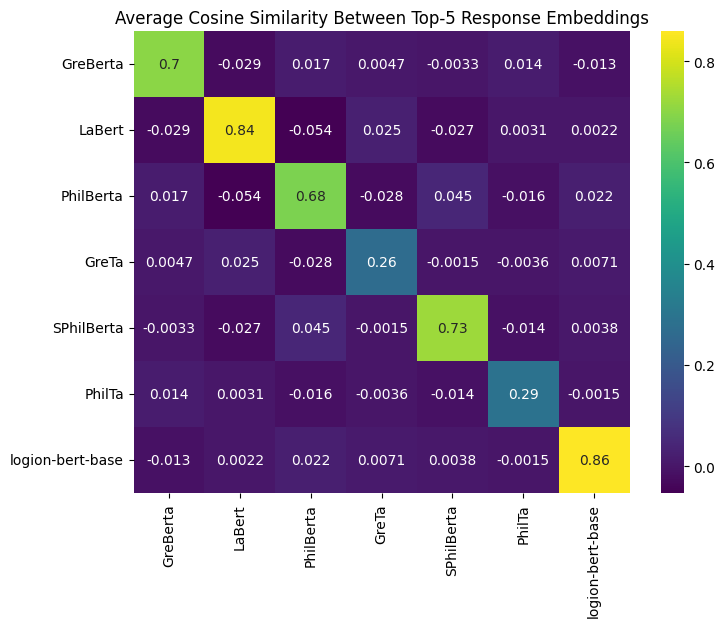

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, xticklabels=model_names, yticklabels=model_names, annot=True, cmap="viridis")
plt.title("Average Cosine Similarity Between Top-5 Response Embeddings")
plt.show()


### Response vs. Target response

In [108]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample data
ground_truth =pd.read_csv("/home/hawau/Greek-Document-Search-Engine/data/Greek_benchmark.txt", sep="\t")['Query'].tolist()[:5]

df = pd.read_csv("/home/hawau/Greek-Document-Search-Engine/data/Greek_benchmark_best_targets.txt", sep="\t")
top_k = [f"best #{i}" for i in range(0, 10)]

model_responses = df[top_k].iloc[1].tolist()

model_name = "bowphs/GreBerta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name).to(device)

In [109]:
inputs = tokenizer(ground_truth, return_tensors="pt", padding=True, truncation=True).to(device)
with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [110]:
gt_embeddings = outputs['hidden_states'][-1][:,0,:].squeeze().cpu().numpy().astype(np.float32)
gt_embeddings.shape

(5, 768)

In [111]:
inputs = tokenizer(model_responses, return_tensors="pt", padding=True, truncation=True).to(device)
with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True)
resp_embeddings = outputs['hidden_states'][-1][:,0,:].squeeze().cpu().numpy().astype(np.float32)

In [112]:


# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(resp_embeddings, gt_embeddings)

# Get best match similarity for each response (max over 5 GTs)
best_similarities = np.max(similarity_matrix, axis=1)

# Print top-10 responses with their best similarity scores
for i, sim in enumerate(best_similarities):
    print(f"Response {i+1}: '{model_responses[i]}' → Best similarity: {sim:.3f}")


Response 1: 'Σωζομένων γὰρ τῶν ἐπὶ γῆς, χαρὰ ἔσται ἐν οὐρανοῖς, συγχαιρόντων τῶν ἐν τοῖς ὑψίστοις οἰκούντων ἀγγέλων τῇ τῶν ἀνθρώ πων σωτηρίᾳ.' → Best similarity: 0.741
Response 2: 'Οὐκ ἐν τῷ οὐρανῷ μόνον, ἀλλὰ καὶ ἐν τῇ γῇ.' → Best similarity: 0.738
Response 3: 'Οὐ μόνον δὲ ἡ γῆ καὶ τὸ πλήρωμα αὐτῆς, ἀλλὰ καὶ ἡ οἰκουμένη. Ἐν ἐρήμῳ κατοικεῖ ὁ ἁμαρτωλὸς, ὁ δὲ ἐν τῇ Ἐκκλησίᾳ τυγ χάνων τῇ πεπληρωμένῃ τῆς ἁγίας Τριάδος, οὗτος κατοικεῖ τὴν οἰκουμένην, ἥτις ἐστὶν ἡ Ἐκκλησία, ἐπὶ θαλασσῶν τῶν πειρασμῶν ὑπὸ Κυρίου θεμε λιουμένη, καὶ ἐν αὐτοῖς νικῶσα, ἵνα μετὰ τοῦτο ποτιζομένη ἐπὶ ποταμοῦ ἑτοιμασθῇ.' → Best similarity: 0.730
Response 4: 'Εἰ δὲ σπανίως μὲν εὑρίσκοιντο ἐπὶ γῆς τοιοῦτοι, ἐν δὲ τῇ κατ' οὐρανὸν χρηματιζούσῃ Θεοῦ πόλει πληθύει τὸ τοῦ Θεοῦ οἰκητήριον, ἐν ἀγγέλοις, καὶ ἀρχ αγγέλοις, καὶ θείαις δυνάμεσι, καὶ πνεύμασιν ἁγίοις· εἰκότως τὸν τόπον τοῦ Θεοῦ παρ' ἐκείνοις εἴποι ἄν τις, κἀκείνην εἶναι τὴν εἰρήνην ἀληθῶς Σαλὴμ ἐνταῦθα κατὰ τὴν Ἑβραϊκὴν φωνὴν ὠνομασμένην.' → Best similarity: 0.72

In [113]:
similarity_matrix

array([[0.27106538, 0.74144936, 0.40850785, 0.3801004 , 0.29629663],
       [0.29125905, 0.7380973 , 0.45202634, 0.35586762, 0.30790383],
       [0.30746084, 0.7297193 , 0.50498444, 0.36690927, 0.3059656 ],
       [0.2940036 , 0.7270893 , 0.38379282, 0.3932163 , 0.31167772],
       [0.2698199 , 0.7227823 , 0.42407322, 0.33849925, 0.3428017 ],
       [0.3048017 , 0.7225767 , 0.40906876, 0.39388692, 0.3371525 ],
       [0.34726632, 0.7224783 , 0.50887895, 0.41295677, 0.35893077],
       [0.30252653, 0.7168809 , 0.39867008, 0.33644038, 0.2659393 ],
       [0.30958727, 0.715134  , 0.3726765 , 0.37309128, 0.31808   ],
       [0.31651366, 0.7138132 , 0.41717243, 0.38420382, 0.34387365]],
      dtype=float32)

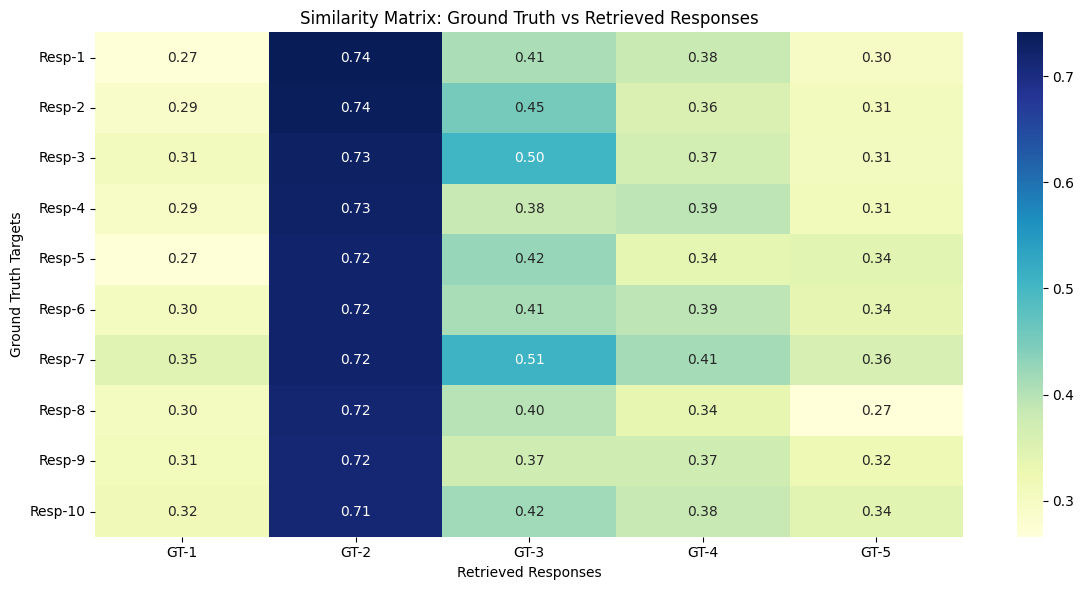

In [114]:
groundtruth_labels = [f"GT-{i}" for i in range(1, 6)]
response_labels = [f"Resp-{i}" for i in range(1, 11)]

df_sim = pd.DataFrame(similarity_matrix, columns=groundtruth_labels, index=response_labels)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_sim, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Similarity Matrix: Ground Truth vs Retrieved Responses")
plt.xlabel("Retrieved Responses")
plt.ylabel("Ground Truth Targets")
plt.tight_layout()
plt.show()

## T-SNE for embeddings

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

device = "cuda:3"
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForMaskedLM, BertTokenizer, BertForMaskedLM

query =pd.read_csv("/home/hawau/Greek-Document-Search-Engine/data/Greek_benchmark.txt", sep="\t")['Query'].tolist()


gt_response = pd.read_csv("/home/hawau/Greek-Document-Search-Engine/data/Greek_benchmark_best_targets.txt", sep="\t")["Target #0"].tolist()
# [50:]

pred_response = pd.read_csv("/home/hawau/Greek-Document-Search-Engine/data/Greek_benchmark_best_targets.txt", sep="\t")["best #1"].tolist()
# [50:]

all_responses = query + gt_response + pred_response
# model_name = "bowphs/GreBerta"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForMaskedLM.from_pretrained(model_name).to(device)

tokenizer = BertTokenizer.from_pretrained("princeton-logion/logion-bert-base")
model = BertForMaskedLM.from_pretrained("princeton-logion/logion-bert-base").to(device)

inputs = tokenizer(all_responses, return_tensors="pt", padding=True, truncation=True).to(device)
with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True)

embeddings = outputs['hidden_states'][-1][:,0,:].squeeze().cpu().numpy().astype(np.float32)

num_samples = len(query)

type_labels = ["query"] * num_samples + ["gt_target"] * num_samples + ["model_response"] * num_samples # Optional: group labels for coloring
labels = [f"Row-{i}" for i in range(num_samples)] * 3

type_to_marker = {'query': 'o', 'gt_target': 'x', 'model_response': '^'}


# --- PCA ---
pca = PCA(n_components=2)
emb_pca = pca.fit_transform(embeddings)

# --- t-SNE ---
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
emb_tsne = tsne.fit_transform(embeddings)


BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


/tmp/ipykernel_2357059/2698056050.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


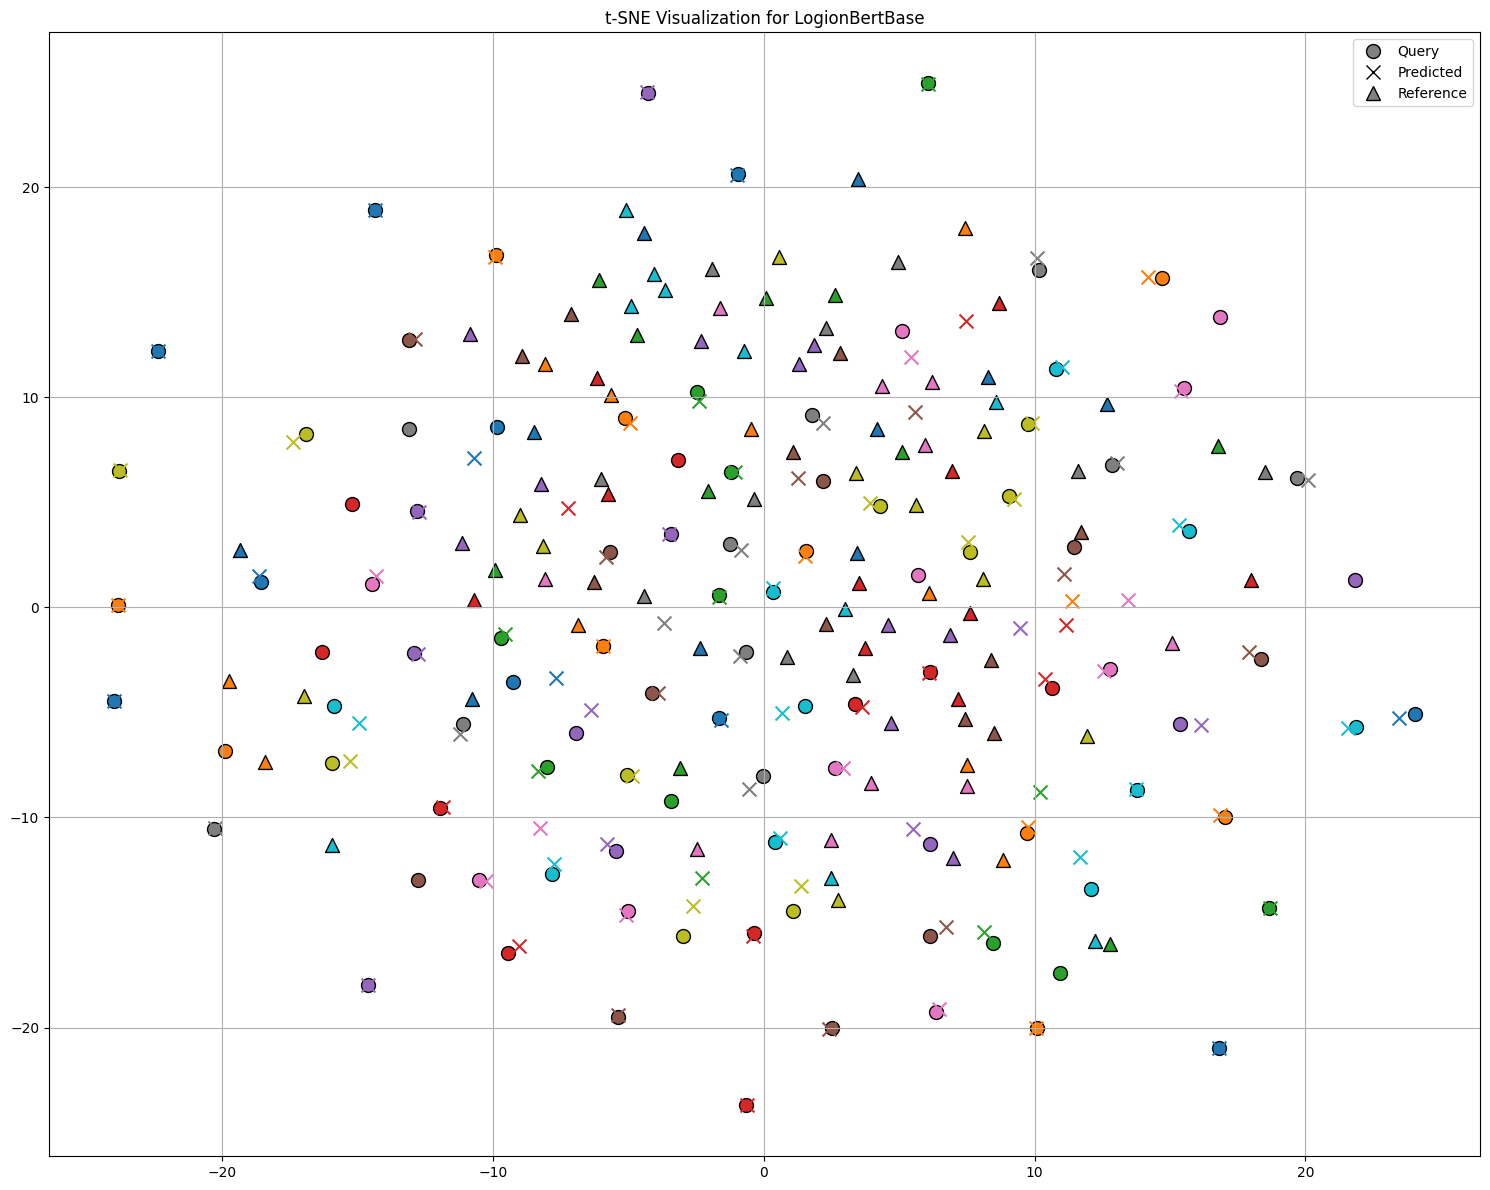

In [8]:
# --- Plotting function ---
def plot_embeddings(emb, title, row_labels=None):
    unique_rows = list(set(row_labels))
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_rows)))
    row_to_color = {row: colors[i] for i, row in enumerate(unique_rows)}
    plt.figure(figsize=(15 ,12))
    for i in range(len(emb)):
        plt.scatter(
            emb[i, 0],
            emb[i, 1],
            marker=type_to_marker[type_labels[i]],
            color=row_to_color[row_labels[i]],
            label=f"{type_labels[i]}-{row_labels[i]}" if i < 3 else None,  # Avoid clutter
            s=100,
            edgecolors='black'
        )

    # Add custom legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Query', markerfacecolor='gray', markersize=10, markeredgecolor='black'),
        Line2D([0], [0], marker='x', color='w', label='Predicted', markerfacecolor='gray', markersize=10, markeredgecolor='black'),
        Line2D([0], [0], marker='^', color='w', label='Reference', markerfacecolor='gray', markersize=10, markeredgecolor='black')
    ]
    plt.legend(handles=legend_elements, loc='best')

    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
# --- Visualize ---
# plot_embeddings(emb_pca, "PCA Visualization", labels)
plot_embeddings(emb_tsne, "t-SNE Visualization for LogionBertBase", labels)